In [1]:
#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize


In [2]:
# Read excel file
file_path = r'D:\Derivatives Trading\Taiwan Equity ETF Database.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [3]:
# Calculate returns (using log returns for better statistical properties)
returns = np.log(df/df.shift(1))

# Clean the returns data
returns = returns.dropna()  # Remove NaN values from the first row

In [4]:
# Basic validation
print("\nReturns Data Shape:", returns.shape)
print("\nFirst few rows of returns:")
print(returns.head())

# Basic statistics
print("\nReturns Summary Statistics:")
print(returns.describe())


Returns Data Shape: (133, 20)

First few rows of returns:
            00701 TW  00915 TW  00918 TW  00919 TW  00927 TW  00929 TW  \
Date                                                                     
2024-05-10  0.020291  0.003805  0.010829  0.002422  0.000539 -0.004461   
2024-05-13 -0.003233 -0.006095  0.003309  0.003221 -0.001618 -0.002985   
2024-05-14 -0.006498  0.001909  0.009452  0.006810  0.009667  0.006456   
2024-05-15  0.011165  0.000763 -0.004920 -0.005203  0.004267  0.000000   
2024-05-16  0.006070  0.009482  0.012661  0.014343  0.013742  0.008381   

            00934 TW  00936 TW  00939 TW  00940 TW  00944 TW  00954 TW  \
Date                                                                     
2024-05-10  0.001071  0.001096  0.002091  0.007334 -0.001346  0.000000   
2024-05-13 -0.002679 -0.007149 -0.003488  0.002086 -0.006757  0.014974   
2024-05-14  0.003748  0.000552  0.009736  0.010363  0.004735 -0.011905   
2024-05-15 -0.001605  0.001653 -0.002772 -0.007243  

In [5]:
# Check for any remaining missing values
#print("\nMissing values check:")
#print(returns.isnull().sum())

# Calculate daily realized volatility
#Simple daily standard deviation
daily_vol = returns.std()

print(daily_vol)


00701 TW    0.009226
00915 TW    0.009763
00918 TW    0.011272
00919 TW    0.011432
00927 TW    0.016171
00929 TW    0.010684
00934 TW    0.011912
00936 TW    0.011354
00939 TW    0.009060
00940 TW    0.010540
00944 TW    0.009464
00954 TW    0.030257
00830 TW    0.024272
00878 TW    0.010768
00881 TW    0.018239
00891 TW    0.017987
00893 TW    0.019848
00894 TW    0.018485
TSMC        0.023224
TAIEX       0.015209
dtype: float64


In [6]:

# Calculate correlation table
corr_matrix = returns.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# List only TAIEX correlations
tsmc_correlations = returns.corr()['TAIEX']
print("\nCorrelations with TAIEX:")
print(tsmc_correlations)


Correlation Matrix:
          00701 TW  00915 TW  00918 TW  00919 TW  00927 TW  00929 TW  \
00701 TW  1.000000  0.743137  0.699356  0.654618  0.670244  0.682979   
00915 TW  0.743137  1.000000  0.903750  0.777351  0.745066  0.819465   
00918 TW  0.699356  0.903750  1.000000  0.836723  0.796881  0.861417   
00919 TW  0.654618  0.777351  0.836723  1.000000  0.863419  0.880538   
00927 TW  0.670244  0.745066  0.796881  0.863419  1.000000  0.904187   
00929 TW  0.682979  0.819465  0.861417  0.880538  0.904187  1.000000   
00934 TW  0.698054  0.793820  0.813111  0.880184  0.885245  0.890409   
00936 TW  0.642386  0.755627  0.738228  0.685249  0.671433  0.756394   
00939 TW  0.748913  0.798604  0.855623  0.881210  0.863150  0.904413   
00940 TW  0.755761  0.815929  0.880860  0.902796  0.879159  0.913625   
00944 TW  0.791440  0.812876  0.830016  0.849362  0.845286  0.864184   
00954 TW  0.597520  0.544285  0.563054  0.564719  0.587368  0.581551   
00830 TW  0.590875  0.616396  0.624004  0.6

In [7]:
# Prepare data for regression
Y = returns['TAIEX']  # Dependent variable
X = returns.drop('TAIEX', axis=1)  # Independent variables
X = sm.add_constant(X)  # Add constant term

# Perform regression
model = sm.OLS(Y, X).fit()

# Print regression summary
print("\nRegression Results:")
print(model.summary())


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  TAIEX   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     396.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           4.52e-94
Time:                        19:02:27   Log-Likelihood:                 648.73
No. Observations:                 133   AIC:                            -1257.
Df Residuals:                     113   BIC:                            -1200.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.00

In [8]:
# Get coefficients with their p-values
coef_summary = pd.DataFrame({
    'Coefficient': model.params,
    'P-value': model.pvalues,
    'Standard Error': model.bse
}).sort_values('P-value')  # Sort by statistical significance

print("\nSorted Coefficients by P-value:")
print(coef_summary)
#Some of them are not statistically significant due to lack of data


Sorted Coefficients by P-value:
          Coefficient       P-value  Standard Error
TSMC         0.316704  4.631166e-31        0.019651
00918 TW     0.249716  3.458482e-06        0.051135
00701 TW     0.163641  1.526916e-04        0.041754
00915 TW    -0.199692  1.704076e-04        0.051348
00944 TW     0.201211  9.381097e-04        0.059214
00940 TW     0.183902  5.103644e-03        0.064387
00878 TW    -0.147189  7.932453e-03        0.054454
00954 TW    -0.019997  1.709570e-02        0.008262
00936 TW     0.061738  2.300989e-02        0.026788
00881 TW     0.078653  5.017867e-02        0.039731
00894 TW     0.081154  5.960252e-02        0.042648
00891 TW     0.057803  2.287916e-01        0.047770
00927 TW     0.046138  2.299888e-01        0.038229
00893 TW     0.022391  2.495989e-01        0.019348
00919 TW    -0.044101  2.954874e-01        0.041960
const       -0.000158  4.013141e-01        0.000187
00929 TW    -0.036567  5.072799e-01        0.054972
00939 TW     0.035063  5.774618

In [9]:
# Calculate tracking error
# Tracking Error = Standard deviation of the difference between ETF and TAIEX returns
tracking_error = (returns.sub(returns['TAIEX'], axis=0)).std() * np.sqrt(252)  # Annualized
print("\nAnnualized Tracking Error vs TAIEX:")
print(tracking_error)



Annualized Tracking Error vs TAIEX:
00701 TW    0.162533
00915 TW    0.159008
00918 TW    0.143478
00919 TW    0.134310
00927 TW    0.100005
00929 TW    0.124806
00934 TW    0.127259
00936 TW    0.174068
00939 TW    0.139984
00940 TW    0.121119
00944 TW    0.139169
00954 TW    0.391734
00830 TW    0.245013
00878 TW    0.124877
00881 TW    0.102724
00891 TW    0.116154
00893 TW    0.228228
00894 TW    0.112355
TSMC        0.162357
TAIEX       0.000000
dtype: float64


In [10]:
# Sort tracking error from highest to lowest
tracking_error_sorted = tracking_error.sort_values(ascending=False)
print("\nAnnualized Tracking Error vs TAIEX (Ranked High to Low):")
print(tracking_error_sorted)



Annualized Tracking Error vs TAIEX (Ranked High to Low):
00954 TW    0.391734
00830 TW    0.245013
00893 TW    0.228228
00936 TW    0.174068
00701 TW    0.162533
TSMC        0.162357
00915 TW    0.159008
00918 TW    0.143478
00939 TW    0.139984
00944 TW    0.139169
00919 TW    0.134310
00934 TW    0.127259
00878 TW    0.124877
00929 TW    0.124806
00940 TW    0.121119
00891 TW    0.116154
00894 TW    0.112355
00881 TW    0.102724
00927 TW    0.100005
TAIEX       0.000000
dtype: float64


In [11]:
########################################################Linear Programming@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#Information
#Cathay US PHLX Semi (00830)
#Cathay TW High Div (00878)
#CTBC TW Leading Semiconductor (00891)
#CTBC Aristocrates 30 (00894)
#KGI TW Premium High Div 30 (00915)
#United Taiwan High Div Recovery 30 (00918)
#Capital TW Select High Div (00919)
#Capital TW Semiconductor Div (00927)
#Fuh Hwa Taiwan Technology Div (00929)
#CTBC TW Growth and High Div (00934)
#Taishin TW High Div Sm/Mid-Cap (00936)
#UPAMC Taiwan High Dividend Momentum (00939)
#Yuanta Taiwan Value High Dividend (00940)
#Nomura TW Momentum High Div (00944)
#Capital TW Tech High Div (00946)
#Cathay Global Autonomous and EV (00893)
#CTBC Japan Semiconductor (00954)
#Cathay Low Vol Select 30 (00701)
#Cathay Taiwan 5G Plus (00881)
#TSMC (2330)

In [12]:
# Dividend yields as a dictionary
DIVIDEND_YIELDS = {
    '00701 TW': 0.0372,
    '00893 TW': 0,
    '00881 TW': 0.0713,
    '00894 TW': 0.0729,
    '00830 TW': 0.0332,
    '00918 TW': 0.1210,
    '00939 TW':0.0523,
    '00915 TW': 0.1045,
    '00891 TW':0.0924,
    '00940 TW': 0.0607,
    '00944 TW':0.0478,
    '00934 TW': 0.0473,
    '00878 TW': 0.0907,
    '00954 TW': 0,
    '00919 TW': 0.1117,
    '00927 TW': 0.1042,
    '00936 TW': 0.0667,
    '00929 TW': 0.1037,
    'TSMC':0.0144
   
}




In [13]:

def calculate_portfolio_metrics(weights, returns_data, benchmark_col='TAIEX'):
    """Calculate portfolio tracking error"""
    portfolio_returns = np.dot(returns_data.drop(benchmark_col, axis=1), weights)
    benchmark_returns = returns_data[benchmark_col]
    
    # Calculate tracking error
    return_diff = portfolio_returns - benchmark_returns
    tracking_error = np.std(return_diff) * np.sqrt(252)  # Annualized
    
    return tracking_error

def calculate_portfolio_dividend_yield(weights, assets):
    """Calculate portfolio dividend yield"""
    portfolio_yield = 0
    for asset, weight in zip(assets, weights):
        portfolio_yield += weight * DIVIDEND_YIELDS.get(asset, 0)
    return portfolio_yield

def objective_function(weights, returns_data, assets, benchmark_col='TAIEX', lambda_param=0.5):
    """
    Objective function to minimize:
    Combines tracking error (to minimize) and negative dividend yield (to maximize)
    """
    tracking_error = calculate_portfolio_metrics(weights, returns_data)
    dividend_yield = calculate_portfolio_dividend_yield(weights, assets)
    return lambda_param * tracking_error - (1 - lambda_param) * dividend_yield

# Setup optimization
assets = returns.drop('TAIEX', axis=1).columns
n_assets = len(assets)
initial_weights = np.array([1/n_assets] * n_assets)

# Find TSMC index
tsmc_idx = np.where(assets == '2330.TW')[0][0] if '2330.TW' in assets else None

# Constraints
constraints = [
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
]

# Add minimum weight constraints for all assets
for i in range(n_assets):
    constraints.append({'type': 'ineq', 'fun': lambda x, i=i: x[i] - 0.02})  # weight >= 2%

# Add TSMC constraint if found
if tsmc_idx is not None:
    constraints.append(
        {'type': 'ineq', 'fun': lambda x: 0.20 - x[tsmc_idx]}  # TSMC <= 20%
    )

bounds = tuple((0.02, 1) for _ in range(n_assets))  # 2% <= weight <= 100%

# Optimize portfolio
result = minimize(objective_function,
                 initial_weights,
                 args=(returns, assets),
                 method='SLSQP',
                 bounds=bounds,
                 constraints=constraints)


In [14]:
# Get optimal weights
optimal_weights = pd.Series(result.x, index=assets)
optimal_weights = optimal_weights.sort_values(ascending=False)

# Calculate final metrics
final_te = calculate_portfolio_metrics(result.x, returns)
final_div_yield = calculate_portfolio_dividend_yield(result.x, assets)

# Calculate portfolio returns for additional metrics
portfolio_returns = returns.drop('TAIEX', axis=1).dot(optimal_weights)
benchmark_returns = returns['TAIEX']

# Calculate additional metrics
correlation = portfolio_returns.corr(benchmark_returns)
beta = np.cov(portfolio_returns, benchmark_returns)[0,1] / np.var(benchmark_returns)
r_squared = correlation ** 2
portfolio_vol = portfolio_returns.std() * np.sqrt(252)
benchmark_vol = benchmark_returns.std() * np.sqrt(252)

print("\n=== Optimal Portfolio Results ===")
print("\nAll Portfolio Weights:")
weights_df = optimal_weights.to_frame('Weight')
weights_df['Dividend Yield'] = [DIVIDEND_YIELDS.get(asset, 0) for asset in weights_df.index]
weights_df['Contribution to Yield'] = weights_df['Weight'] * weights_df['Dividend Yield']
print(weights_df.round(4))
print(f"\nSum of weights: {optimal_weights.sum():.4f}")

print("\n=== Weight Distribution ===")
print(f"Minimum weight: {optimal_weights.min():.4f}")
print(f"Maximum weight: {optimal_weights.max():.4f}")
print(f"Number of positions at minimum (2%): {sum(optimal_weights <= 0.021)}")

if '2330.TW' in assets:
    print(f"\nTSMC (2330.TW) weight: {optimal_weights['2330.TW']:.4f}")

print("\n=== Portfolio Metrics ===")
print(f"Portfolio Dividend Yield: {final_div_yield:.4%}")
print(f"Annualized Tracking Error: {final_te:.4f}")
print(f"Beta to TAIEX: {beta:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Correlation with TAIEX: {correlation:.4f}")
print(f"Portfolio Volatility (annualized): {portfolio_vol:.4f}")
print(f"TAIEX Volatility (annualized): {benchmark_vol:.4f}")


=== Optimal Portfolio Results ===

All Portfolio Weights:
          Weight  Dividend Yield  Contribution to Yield
TSMC      0.2202          0.0144                 0.0032
00918 TW  0.2126          0.1210                 0.0257
00927 TW  0.1714          0.1042                 0.0179
00894 TW  0.0670          0.0729                 0.0049
00881 TW  0.0372          0.0713                 0.0027
00891 TW  0.0316          0.0924                 0.0029
00915 TW  0.0200          0.1045                 0.0021
00934 TW  0.0200          0.0473                 0.0009
00929 TW  0.0200          0.1037                 0.0021
00940 TW  0.0200          0.0607                 0.0012
00936 TW  0.0200          0.0667                 0.0013
00944 TW  0.0200          0.0478                 0.0010
00954 TW  0.0200          0.0000                 0.0000
00830 TW  0.0200          0.0332                 0.0007
00878 TW  0.0200          0.0907                 0.0018
00939 TW  0.0200          0.0523             

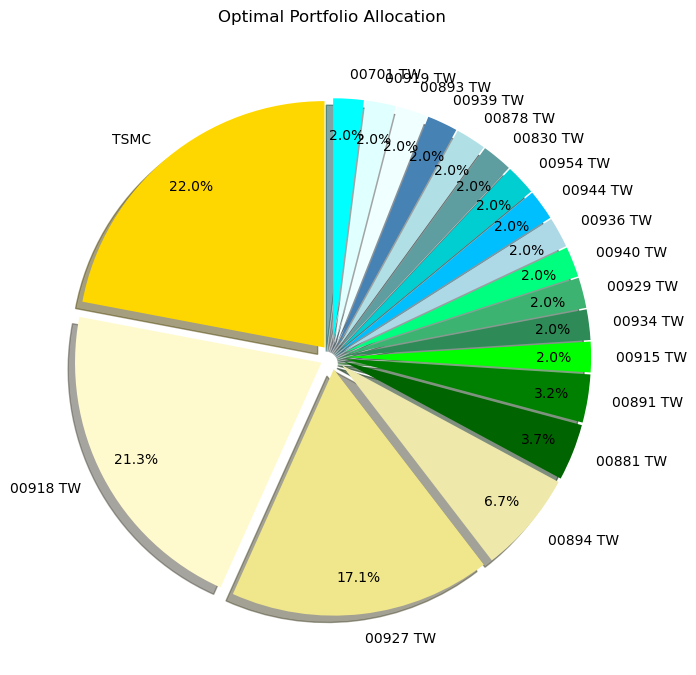

In [15]:
import matplotlib.pyplot as plt

# Create a custom color map with distinct colors for each slice
colors = [
    'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 'darkgreen', 
    'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen',
    'lightblue', 'deepskyblue', 'darkturquoise', 'cadetblue', 'powderblue',
    'steelblue', 'azure', 'lightcyan', 'aqua', 'aliceblue'
]

# Create the figure and axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create explode array for slight separation of slices
explode = [0.05] * len(optimal_weights)

# Plot the pie chart 
patches, texts, autotexts = plt.pie(optimal_weights.values, 
                                   explode=explode,
                                   labels=optimal_weights.index,
                                   autopct='%1.1f%%',
                                   shadow=True,  # Add shadow for 3D effect
                                   startangle=90,
                                   pctdistance=0.85,
                                   colors=colors[:len(optimal_weights)])  # Use distinct colors

# Tilt the pie chart slightly
ax.set_aspect("equal")

# Set title
plt.title('Optimal Portfolio Allocation', pad=20)



plt.show()